# Random number generation (3)
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (1) Define probability distribution to generate

In [5]:
# Considered distribution is
#    g(x) =  sin(x)^2/x^2
#
# It does not need to be normalized here!

def mypdf(x):
    val = (np.sin(x)/x)**2
    return val

### (2) Define function limiting the probability distribution from above

In [6]:
# Considered distribution is always below
#    f(x) = 1.5/(x^2+1)

def mylim(x):
    val = 1.5/(1+x*x)
    return val

### (3) Define inverse of cumulative distribution for approximate shape

In [7]:
# Cumulative distribution function for Cauchy distribution is
#
#   F(x) =  np.arctan(x)/np.pi + 0.5
#

def invF(u):
    x = np.tan(np.pi*(u-0.5))
    return x
    

### (4) Define weighting function 

In [9]:
# Considered distribution is
#    g(x) =  sin(x)^2/x^2
#  it is always below
#    f(x) = 1.5/(x^2+1)

def rAcc(x):
    val = mypdf(x)
    norm = mylim(x)
    return val/norm

### (5) Generate a set of random variables from given distribution

In [29]:
# Number of generations

Nmc = 1000

# calculate values from limiting distribution

u_tab = np.random.uniform(size=Nmc)

v_tab = invF(u_tab)

# calculate acceptance weights

r_tab = np.random.uniform(size=Nmc)

w_tab = r_tab < rAcc(v_tab)



### (6) Plot results

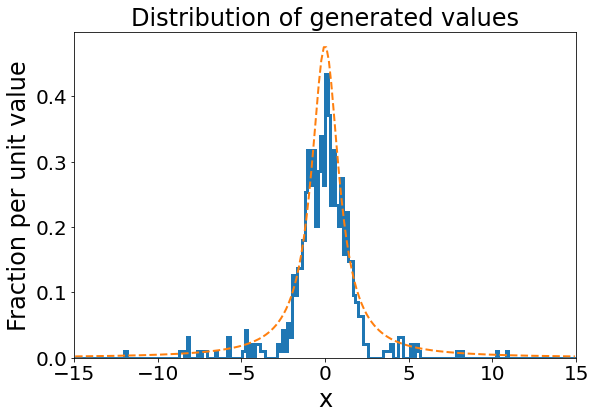

In [31]:
# Number of bins in the histogram

Nbin = 200

Xmin=-15.
Xmax= 15.

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(v_tab[w_tab],bins=Nbin, range=[Xmin,Xmax], density=True, log=False, histtype='step',linewidth=3)

plt.xlabel('x',size=24)
plt.ylabel('Fraction per unit value',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Distribution of generated values",size=24)
plt.xlim([Xmin,Xmax])

# Expected dependence

dX = (Xmax-Xmin)/Nbin
x_tab = np.linspace(Xmin+dX/2,Xmax-dX/2,Nbin)   # Use points in the middle of the bin
y_tab = mylim(x_tab)/np.pi
plt.plot(x_tab,y_tab,'--',linewidth=2)

fname = '04_generate3_'+str(Nmc)+'.png'
plt.savefig(fname)

plt.show()

In [32]:
print('Generation efficiency: ',np.sum(w_tab)/Nmc)

Generation efficiency:  0.646
